In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/train_with_cv.csv')
test = pd.read_csv('/content/test_with_cv.csv')

In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)
test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
train.head()

,CandidateID,Designation,Have you Completed your Graduation ?,Highest Educational Qualification,Total no of years Experience [before joining Piramal],Previous Industry worked with [before joining Piramal],Name of your Previous Organization / Company,How many Organization that you have worked before joining Piramal Finance ?,Average Incentive [per month] earned in your pervious company ?,How did you come to know about the role at Piramal Finance ?,...,experience,education,skills,projects,Salary_Min,Salary_Max,avg_prev_earned_salary_per_month,prev_ticket_size,family_size_min,family_size_max
0,EMP0669,DST,Full Time,Graduate,5.0,NBFC,ADITYA BIRLA CAPITAL FINANCE,03-May,Above 10K,Others,...,work experience worked varun motors pvt ltd s...,NaN,opportunity contribute effectively growth perf...,work experience hereby declare furnished infor...,10,10,10000.0,500000.0,1,1
1,EMP0273,DST,Full Time,Graduate,1.5,Banking,IDFC FIRST BANK LIMITED,01-Feb,7K-10K,Advertisement / Job Portal,...,self motivated energetic quick learning willin...,NaN,NaN,work team dedication work experience summary ...,7,7,7000.0,200000.0,3,3
2,EMP0300,DST,Full Time,Under Graduate,4.5,Banking,Onerufe Resource private limited,03-May,Less than 3K,Referral,...,selfmotivated aspire work demanding environmen...,NaN,selfmotivated aspire work demanding environmen...,selfmotivated aspire work demanding environmen...,3,3,3000.0,1500000.0,3,3
3,EMP0100,DST,Full Time,Post Graduate,4.5,Banking,Kotak Mahindra Bank Ltd,01-Feb,Above 10K,Consultant / Partners,...,positions responsibility effective planning s...,apjabdul kalam technical university,apjabdul kalam technical university,projects summer project work experience,10,10,10000.0,1500000.0,3,3
4,EMP0319,DST,Full Time,Post Graduate,1.0,others,R.G Enterprises,01-Feb,Nil,others,...,intend build career professional work environm...,bvoc bachelors degree bharathidasan univ...,intend build career professional work environm...,intend build career professional work environm...,0,0,0.0,NaN,3,3


In [ ]:
train.isnull().sum()

CandidateID                                                                      0
Designation                                                                      0
Have you Completed your Graduation ?                                           101
Highest Educational Qualification                                              101
Total no of years Experience [before joining Piramal]                           74
Previous Industry worked with [before joining Piramal]                           0
Name of your Previous Organization / Company                                   192
How many Organization that you have worked before joining Piramal Finance ?     74
Average Incentive [per month] earned in your pervious company ?                  0
How did you come to know about the role at Piramal Finance ?                     0
Which Products you are selling in your pervious role ?                           6
What was the average ticket size handled at your end in previous role ?          0
How 

In [ ]:
train.columns

Index(['CandidateID', 'Designation', 'Have you Completed your Graduation ?',
       'Highest Educational Qualification',
       'Total no of years Experience [before joining Piramal]',
       'Previous Industry worked with [before joining Piramal]',
       'Name of your Previous Organization / Company',
       'How many Organization that you have worked before joining Piramal Finance ?',
       'Average Incentive [per month] earned in your pervious company ?',
       'How did you come to know about the role at Piramal Finance ?',
       'Which Products you are selling in your pervious role ?',
       'What was the average ticket size handled at your end in previous role ?',
       'How many members are there in your family ?',
       'How many are earning family members ? [Other then yourself]2',
       'How many members are dependent on you ?', 'Department', 'DOJ',
       'Location Code', 'Residential Pincode', 'Branch Pincode', 'Performance',
       'experience', 'education', 'skills

In [ ]:
train['How many Organization that you have worked before joining Piramal Finance ?'].value_counts()

How many Organization that you have worked before joining Piramal Finance ?
01-Feb         319
03-May         198
0 / Fresher    107
5+              47
Name: count, dtype: int64

In [ ]:
test['How many Organization that you have worked before joining Piramal Finance ?'].value_counts()

How many Organization that you have worked before joining Piramal Finance ?
01-Feb         81
03-May         61
0 / Fresher    21
5+             11
a               1
Name: count, dtype: int64

In [ ]:
train['how_many_prev_org'] = train['experience']
test['how_many_prev_org'] = test['experience']


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")


# Iterate through the "Which Products you are selling in your previous role ?" column

def scan_keywords1(df,label,keywords):
  for i, row in df.iterrows():
    text = str(row[label])
    doc = nlp(text)

    # Find the keywords in the text
    found_keywords = []
    for token in doc:
        if token.text.lower() in [kw.lower() for kw in keywords]:
            found_keywords.append(token.text)

    # Replace the column value with the found keywords
    if found_keywords:
        df.at[i, label] = ", ".join(found_keywords)
    else:
        df.at[i, label] = "NONE, NONE, NONE, NONE, NONE, NONE"




In [ ]:
keywords = ['organization','company','startup','enterprise']
scan_keywords1(train,'how_many_prev_org',keywords)
scan_keywords1(test,'how_many_prev_org',keywords)

In [ ]:
def count_words(cell):
    return len(cell)

In [ ]:
train['how_many_prev_org']=train['how_many_prev_org'].str.split(',').apply(count_words)
test['how_many_prev_org']=test['how_many_prev_org'].str.split(',').apply(count_words)

In [ ]:
train['how_many_prev_org'].unique()

array([6, 2, 1, 4, 3])

In [ ]:
xxx = train[(train['How many Organization that you have worked before joining Piramal Finance ?']=='03-May') & (train['how_many_prev_org']>=1)]

In [ ]:
xxx.shape

(198, 32)

In [ ]:
train['How many Organization that you have worked before joining Piramal Finance ?'] = train.apply(lambda row:
    2 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 2 else
    1 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 1 else
    0 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 6 else
    3 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 3 else
    4 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 4 else
    row['How many Organization that you have worked before joining Piramal Finance ?'], axis=1)

train['How many Organization that you have worked before joining Piramal Finance ?'] = train.apply(lambda row:
    2 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 2 else
    1 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 1 else
    0 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 6 else
    3 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 3 else
    4 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 4 else
    row['How many Organization that you have worked before joining Piramal Finance ?'], axis=1)


train['How many Organization that you have worked before joining Piramal Finance ?']= train['How many Organization that you have worked before joining Piramal Finance ?'].replace({'0 / Fresher':0,'5+':6,'a':0})



test['How many Organization that you have worked before joining Piramal Finance ?'] = test.apply(lambda row:
    2 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 2 else
    1 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 1 else
    0 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 6 else
    3 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 3 else
    4 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '01-Feb' and row['how_many_prev_org'] == 4 else
    row['How many Organization that you have worked before joining Piramal Finance ?'], axis=1)

test['How many Organization that you have worked before joining Piramal Finance ?'] = test.apply(lambda row:
    2 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 2 else
    1 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 1 else
    0 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 6 else
    3 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 3 else
    4 if row['How many Organization that you have worked before joining Piramal Finance ?'] == '03-May' and row['how_many_prev_org'] == 4 else
    row['How many Organization that you have worked before joining Piramal Finance ?'], axis=1)


test['How many Organization that you have worked before joining Piramal Finance ?']= test['How many Organization that you have worked before joining Piramal Finance ?'].replace({'0 / Fresher':0,'5+':6,'a':0,'03-May':1})

In [ ]:
test['How many Organization that you have worked before joining Piramal Finance ?'].value_counts()

How many Organization that you have worked before joining Piramal Finance ?
0.0    125
1.0     20
2.0     14
6.0     11
3.0      3
4.0      2
Name: count, dtype: int64

In [ ]:
def count_plot(label):
  # Assuming 'train' and 'test' are your DataFrames


  plt.figure(figsize=(18, 5))

  # Plotting the train countplot
  ax1 = plt.subplot(1, 2, 1)
  sns.countplot(y=train[label],color='blue')
  plt.title('Train Data')



  # Plotting the test countplot
  ax2 = plt.subplot(1, 2, 2)
  sns.countplot(y=test[label],color='orange')
  plt.title('Test Data')

  # Annotating test countplot with percentage label

  plt.tight_layout()
  plt.show()



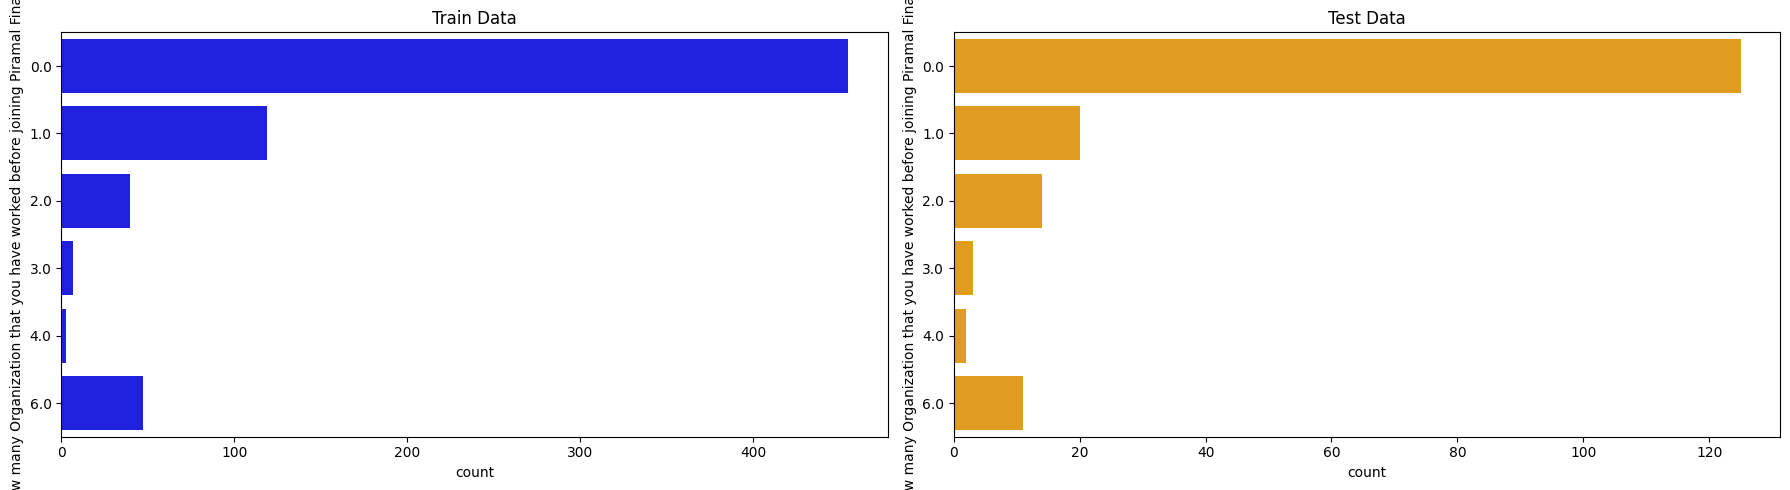

In [ ]:
count_plot('How many Organization that you have worked before joining Piramal Finance ?')

In [ ]:
train['Average Incentive [per month] earned in your pervious company ?'].value_counts()

Average Incentive [per month] earned in your pervious company ?
Above 10K       301
3K-7K           209
7K-10K          120
Nil              72
Less than 3K     43
Name: count, dtype: int64

In [ ]:
test['Average Incentive [per month] earned in your pervious company ?'].value_counts()

Average Incentive [per month] earned in your pervious company ?
Above 10K       65
3K-7K           57
7K-10K          38
Nil             15
Less than 3K    12
Name: count, dtype: int64

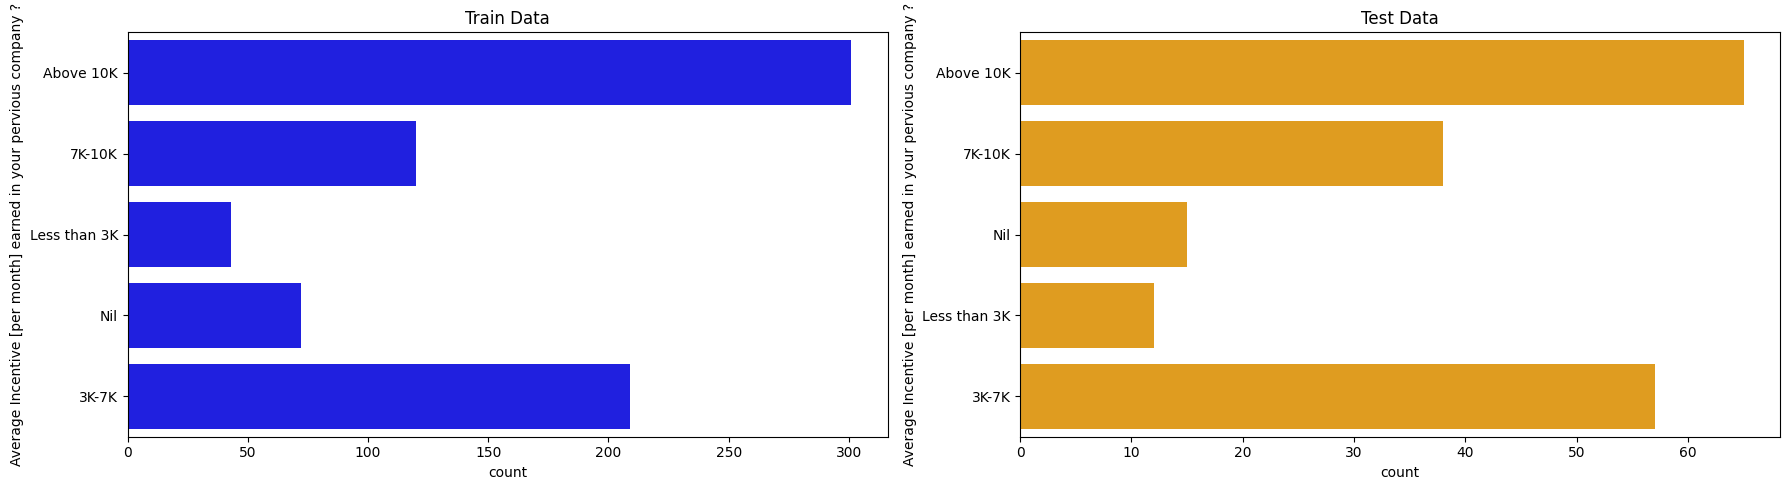

In [ ]:
count_plot('Average Incentive [per month] earned in your pervious company ?')

In [ ]:
import re
import string
from nltk.corpus import stopwords

def clean_text(text):
    """
    Cleans the input text by removing stop words, links, special characters, symbols, and converting to lowercase.

    Args:
        text (str): The input text to be cleaned.

    Returns:
        str: The cleaned text.
    """
    # Convert to lowercase
    text = str(text).lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word not in stop_words]

    # Remove links
    text = re.sub(r'http\S+|www\.\S+', '', ' '.join(words))

    # Remove special characters and symbols
    text = re.sub(r'[^\w\s]', '', text)

    # Remove any other messy words
    text = re.sub(r'\b\w{1,2}\b', '', text)

    return text.strip()

In [ ]:



nlp = spacy.load("en_core_web_sm")


# Iterate through the "Which Products you are selling in your previous role ?" column

def scan_keywords(df,label,keywords):
  for i, row in df.iterrows():
    text = str(row[label])
    doc = nlp(text)

    # Find the keywords in the text
    found_keywords = []
    for token in doc:
        if token.text.lower() in [kw.lower() for kw in keywords]:
            found_keywords.append(token.text)

    # Replace the column value with the found keywords
    if found_keywords:
        df.at[i, label] = ", ".join(found_keywords)
    else:
        df.at[i, label] = "NONE"




In [ ]:
keywords = ['housing','msme','cars','personal','unsecured','business','fmcg','casa','others','nan','secured']
scan_keywords(train,'Which Products you are selling in your pervious role ?',keywords)
scan_keywords(test,'Which Products you are selling in your pervious role ?',keywords)

In [ ]:
train['prev_product_selling'] = train['experience']
test['prev_product_selling'] = test['experience']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
test['prev_product_selling'] = test['prev_product_selling'].apply(clean_text)
train['prev_product_selling'] = train['prev_product_selling'].apply(clean_text)

In [ ]:
train['Which Products you are selling in your pervious role ?'].unique()

array(['MSME', 'Personal', 'Housing', 'CASA', 'Others', 'NONE', 'FMCG',
       'Business', 'MSME, CASA', 'Secured, Business', 'Personal, CASA',
       'Housing, CASA', 'nan'], dtype=object)

In [ ]:
keywords = ['msme','housing','fmcg','personal','casa','business','secured']
scan_keywords(train,'prev_product_selling',keywords)
scan_keywords(test,'prev_product_selling',keywords)

In [ ]:
train['prev_product_selling'] = train['prev_product_selling'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))
test['prev_product_selling'] = test['prev_product_selling'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))



In [ ]:
test['prev_product_selling'].value_counts()

prev_product_selling
NONE                           152
business                        10
housing                          9
personal                         6
business, personal               4
casa                             2
business, secured                1
casa, personal                   1
business, housing, personal      1
business, housing                1
Name: count, dtype: int64

In [ ]:
xx =test[(test['Which Products you are selling in your pervious role ?']=='NONE') & (test['prev_product_selling']!='NONE')]

In [ ]:
xx['prev_product_selling'].value_counts()

prev_product_selling
business          2
casa, personal    1
personal          1
Name: count, dtype: int64

In [ ]:
train['Which Products you are selling in your pervious role ?'] = train.apply(lambda row:
    'business' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' else
    'business, casa' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'casa' in row['prev_product_selling'] else
    'casa' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'casa' not in row['prev_product_selling'] else
    'business, personal' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'personal' in row['prev_product_selling'] else
    'personal' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'personal' not in row['prev_product_selling'] else
    'housing, personal' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'housing' in row['prev_product_selling'] and 'personal' in row['prev_product_selling'] else
    row['Which Products you are selling in your pervious role ?'], axis=1)


In [ ]:
test['Which Products you are selling in your pervious role ?'] = test.apply(lambda row:
    'business' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'business' in row['prev_product_selling'] else
    'casa, personal' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'casa' in row['prev_product_selling'] and 'personal' in row['prev_product_selling'] else
    'personal' if row['Which Products you are selling in your pervious role ?'] == 'NONE' and row['prev_product_selling'] != 'NONE' and 'personal' in row['prev_product_selling'] else
    row['Which Products you are selling in your pervious role ?'], axis=1)


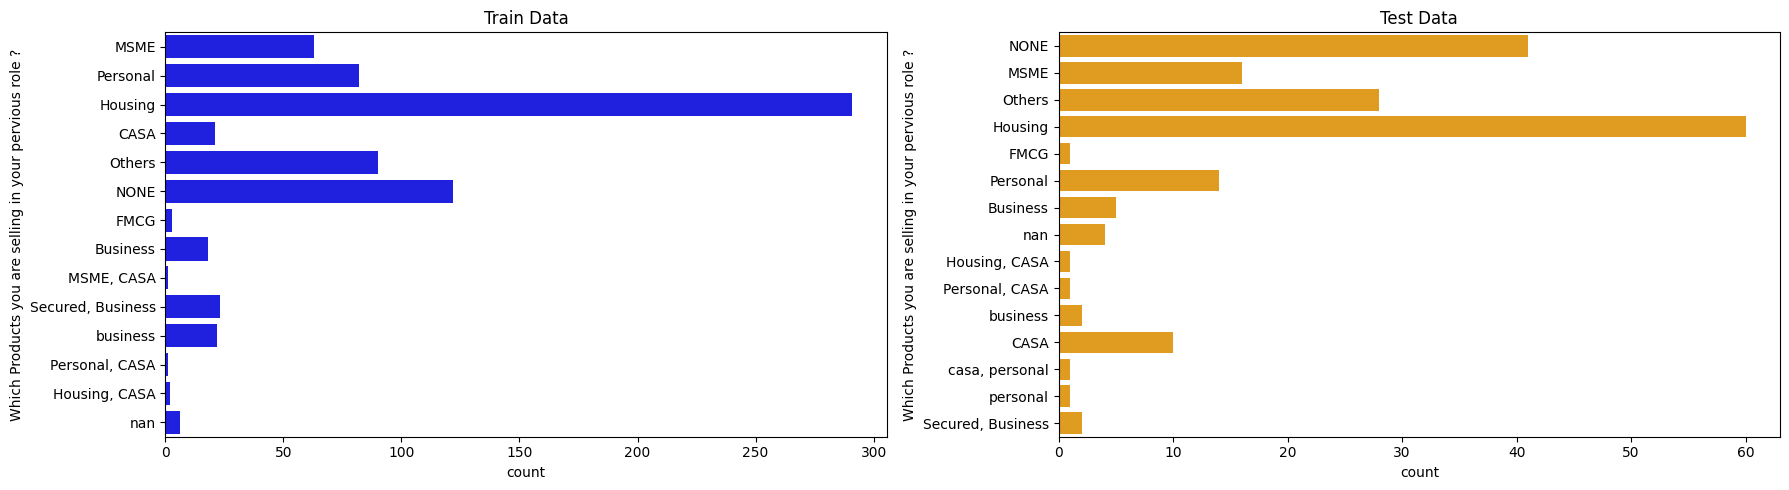

In [ ]:
count_plot('Which Products you are selling in your pervious role ?')

In [ ]:
train['Name of your Previous Organization / Company'] = train['Name of your Previous Organization / Company'].apply(clean_text)

In [ ]:
keywords = ['banks','tata','relince','finance','sales','securites','insurance','financial','fincrop','first bank','idfc','lic','piramal','others','nan','mahindra','hdfc','city'

]
scan_keywords(test,'Name of your Previous Organization / Company',keywords)
scan_keywords(train,'Name of your Previous Organization / Company',keywords)

In [ ]:
import pandas as pd
from wordcloud import WordCloud

def cloud_map(label):
    skills_corpus = ' '.join(train[label])

# Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_font_size=100, random_state=42).generate(skills_corpus)

    # Plot the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {label}')
    plt.show()

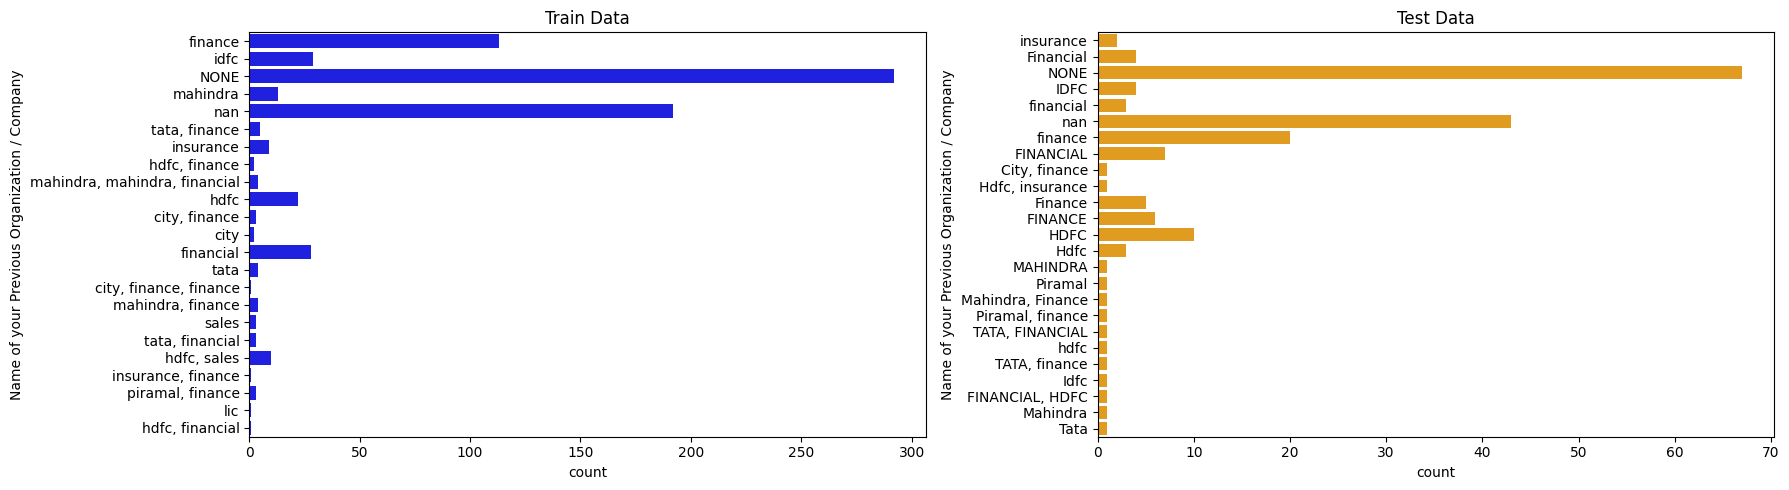

In [ ]:
count_plot('Name of your Previous Organization / Company')

In [ ]:
train['What was the average ticket size handled at your end in previous role ?'].unique()

array(['INR 5L - INR 15L', 'INR 50K - INR 2L', 'INR 15L and above',
       'Fresher', 'INR 10L and above', '\xa0INR 2L - INR 5L',
       'INR 50K and below', 'INR 5L - INR 10L'], dtype=object)

In [ ]:
train['What was the average ticket size handled at your end in previous role ?'].value_counts()

What was the average ticket size handled at your end in previous role ?
INR 15L and above    177
INR 5L - INR 15L     124
 INR 2L - INR 5L     112
INR 10L and above    108
INR 50K - INR 2L      78
Fresher               65
INR 50K and below     64
INR 5L - INR 10L      17
Name: count, dtype: int64

In [ ]:
train['What was the average ticket size handled at your end in previous role ?'] = train['What was the average ticket size handled at your end in previous role ?'].replace({'INR 15L and above':1500000,'INR 5L - INR 15L':1000000,'\xa0INR 2L - INR 5L':350000,'INR 10L and above':1000000,
'INR 50K - INR 2L':125000,'Fresher':0,'INR 50K and below':50000,'INR 5L - INR 10L':750000})

In [ ]:
train['What was the average ticket size handled at your end in previous role ?'] = train['What was the average ticket size handled at your end in previous role ?'].replace({'\xa0INR 2L - INR 5L':350000})

In [ ]:
test['What was the average ticket size handled at your end in previous role ?'] = test['What was the average ticket size handled at your end in previous role ?'].replace({'INR 15L and above':1500000,'INR 5L - INR 15L':1000000,'åÊINR 2L - INR 5L':350000,'INR 10L and above':1000000,
'INR 50K - INR 2L':125000,'Fresher':0,'INR 50K and below':50000,'INR 5L - INR 10L':750000})

In [ ]:
test['What was the average ticket size handled at your end in previous role ?'].value_counts()

What was the average ticket size handled at your end in previous role ?
1000000    54
125000     31
1500000    29
350000     29
50000      23
0          16
750000      5
Name: count, dtype: int64

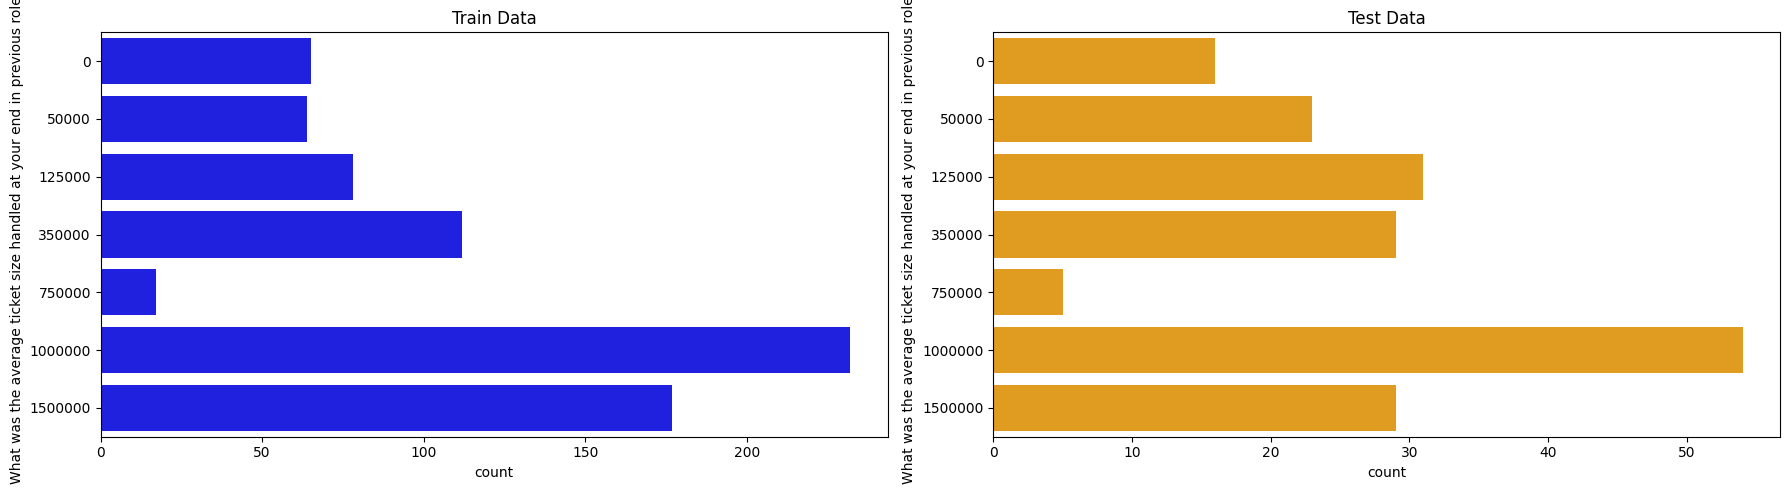

In [ ]:
count_plot('What was the average ticket size handled at your end in previous role ?')

In [ ]:
train['Have you Completed your Graduation ?'] = train['Have you Completed your Graduation ?'].str.replace(' ','_').str.lower()
test['Have you Completed your Graduation ?'] = test['Have you Completed your Graduation ?'].str.replace(' ','_').str.lower()

In [ ]:
train['Have you Completed your Graduation ?'].value_counts()

Have you Completed your Graduation ?
full_time    614
part_time     30
Name: count, dtype: int64

In [ ]:
train['Have you Completed your Graduation ?'] = train['Have you Completed your Graduation ?'].fillna('nan')
train = train.drop(train[train['Have you Completed your Graduation ?'].isin(['nan'])].index)
test['Have you Completed your Graduation ?'] = test['Have you Completed your Graduation ?'].fillna('nan')

In [ ]:
test['Have you Completed your Graduation ?'] = test['Have you Completed your Graduation ?'].replace({'nan':'part_time'})

(0, 39)

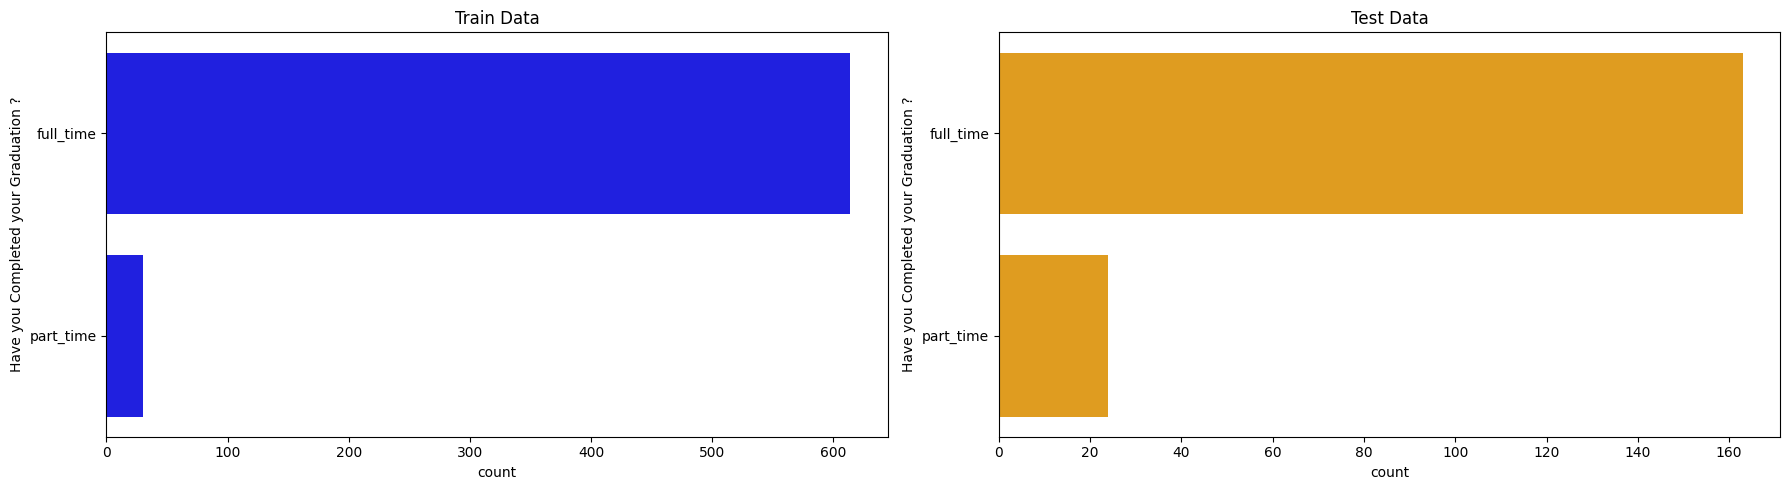

In [ ]:
count_plot('Have you Completed your Graduation ?')

In [ ]:
train['Highest Educational Qualification'] = train['Highest Educational Qualification'].str.replace(' ','_').str.lower()
test['Highest Educational Qualification'] = test['Highest Educational Qualification'].str.replace(' ','_').str.lower()

In [ ]:
test['Highest Educational Qualification'].value_counts()

Highest Educational Qualification
graduate          108
post_graduate      50
under_graduate      8
others              1
Name: count, dtype: int64

In [ ]:
train['Total no of years Experience [before joining Piramal]'] = train['Total no of years Experience [before joining Piramal]'].fillna(-1)

In [ ]:
train['Total no of years Experience [before joining Piramal]'] = train['Total no of years Experience [before joining Piramal]'].replace({-1:train['Total no of years Experience [before joining Piramal]'].mean()})
train['Total no of years Experience [before joining Piramal]'] = train['Total no of years Experience [before joining Piramal]'].astype(int)
train.at[272,'Total no of years Experience [before joining Piramal]'] = 3

In [ ]:
train['Total no of years Experience [before joining Piramal]'] = train['Total no of years Experience [before joining Piramal]'].clip(upper=10)

In [ ]:
test['Total no of years Experience [before joining Piramal]'] = test['Total no of years Experience [before joining Piramal]'].fillna(-1)

In [ ]:
test['Total no of years Experience [before joining Piramal]'] = test['Total no of years Experience [before joining Piramal]'].replace({-1:test['Total no of years Experience [before joining Piramal]'].mean()})
test['Total no of years Experience [before joining Piramal]'] = test['Total no of years Experience [before joining Piramal]'].astype(int)

In [ ]:
test['Total no of years Experience [before joining Piramal]'] = test['Total no of years Experience [before joining Piramal]'].clip(upper=14)

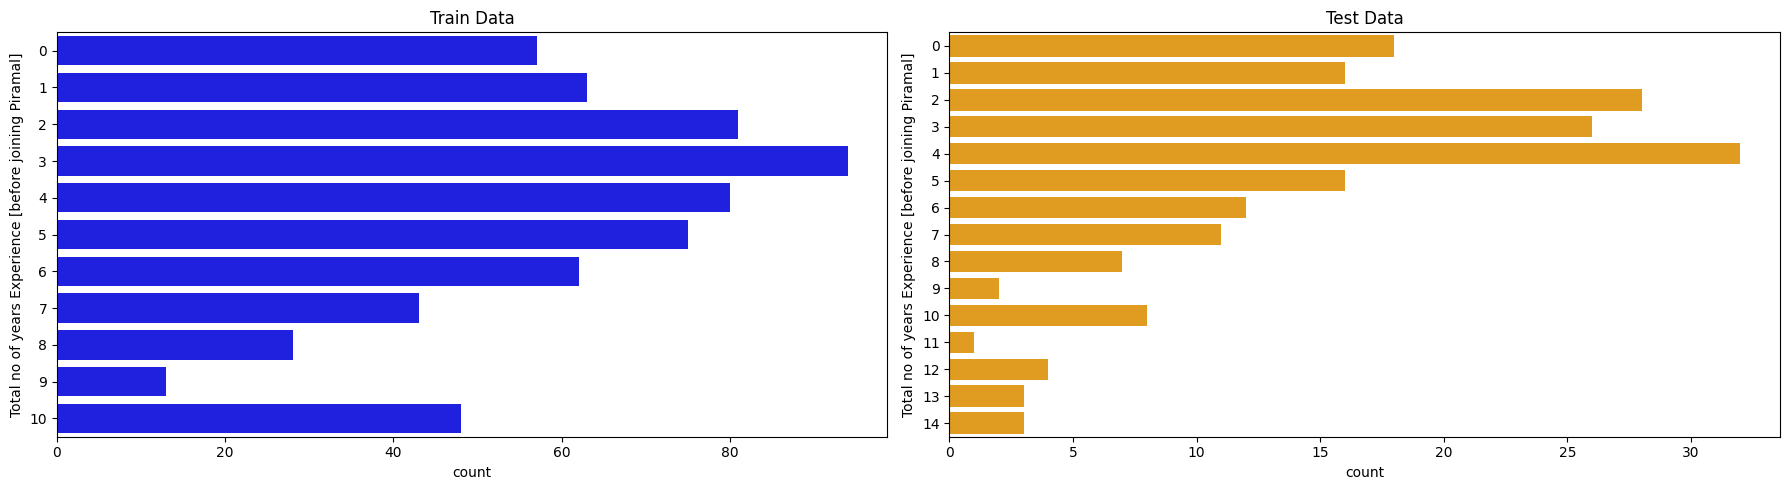

In [ ]:
count_plot('Total no of years Experience [before joining Piramal]')

In [ ]:
train['Previous Industry worked with [before joining Piramal]'] = train['Previous Industry worked with [before joining Piramal]'].str.replace(' ','_').str.lower()
test['Previous Industry worked with [before joining Piramal]'] = test['Previous Industry worked with [before joining Piramal]'].str.replace(' ','_').str.lower()

In [ ]:
train['Previous Industry worked with [before joining Piramal]'].value_counts()

Previous Industry worked with [before joining Piramal]
nbfc         301
banking      185
others       129
insurance     15
non_nbfc      14
Name: count, dtype: int64

In [ ]:
test['Previous Industry worked with [before joining Piramal]'].value_counts()

Previous Industry worked with [before joining Piramal]
nbfc         87
banking      56
others       32
non_nbfc      8
insurance     4
Name: count, dtype: int64

In [ ]:
train['prev_industry'] = train['experience']
test['prev_industry'] = train['experience']

In [ ]:
keywords=['nbfc','banking','insurance','non nbfc']
scan_keywords(train,'prev_industry',keywords)
scan_keywords(test,'prev_industry',keywords)

In [ ]:
train['prev_industry'] = train['prev_industry'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))
test['prev_industry'] = test['prev_industry'].apply(lambda x: ', '.join(sorted(set(x.split(', ')))))

In [ ]:
x2 = train[(train['Previous Industry worked with [before joining Piramal]']=='others') & (train['prev_industry']!="NONE")]

In [ ]:
x2['prev_industry'].value_counts()

prev_industry
insurance             5
banking               2
banking, insurance    1
Name: count, dtype: int64

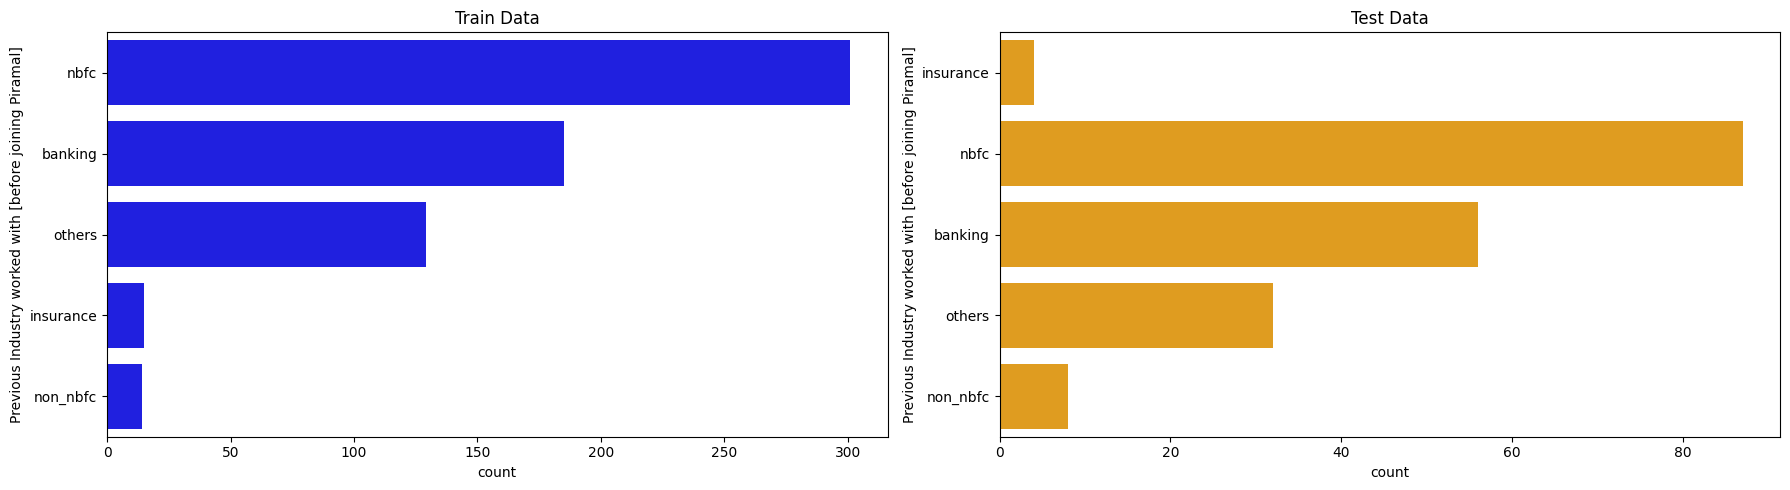

In [ ]:
count_plot('Previous Industry worked with [before joining Piramal]')

In [ ]:
train['Department']  = train['Department'].str.replace(' ','_').str.lower()
test['Department']  = test['Department'].str.replace(' ','_').str.lower()

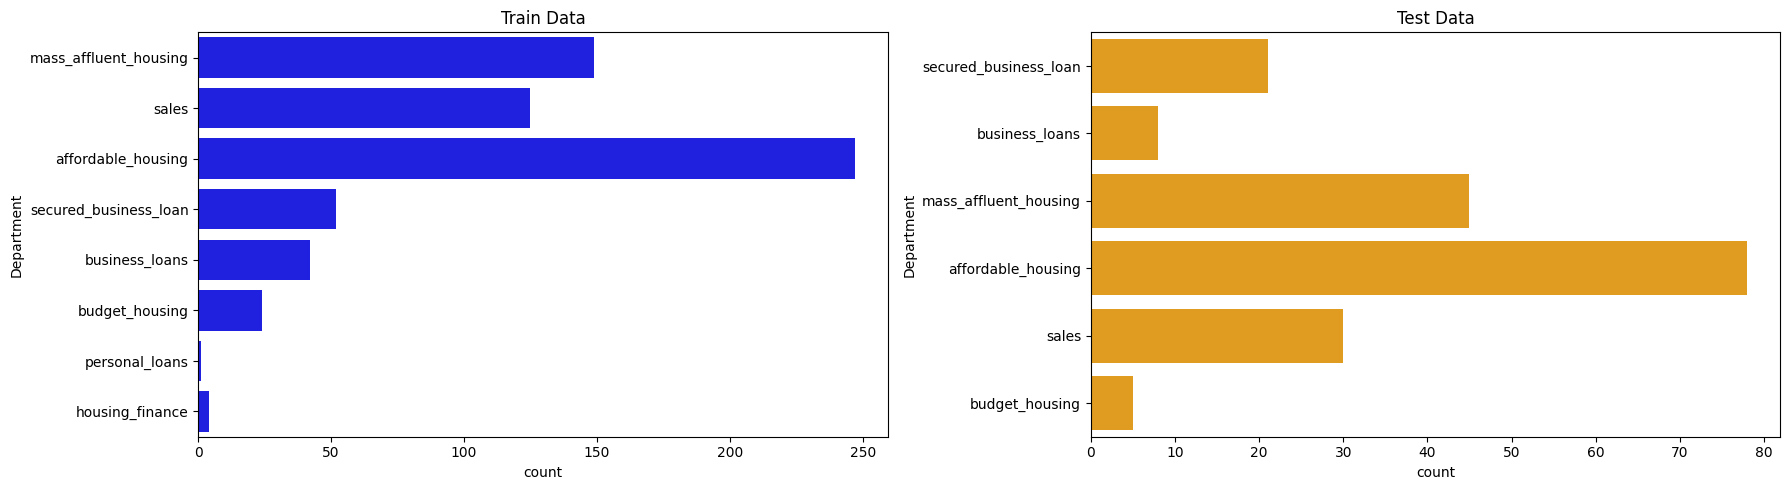

In [ ]:
count_plot('Department')

In [ ]:
train['How did you come to know about the role at Piramal Finance ?'].value_counts()

How did you come to know about the role at Piramal Finance ?
Referral                      354
Consultant / Partners          83
Advertisement / Job Portal     61
Direct Application             54
others                         36
Others                         30
External consultant            20
Campus                          6
Name: count, dtype: int64

In [ ]:
test['How did you come to know about the role at Piramal Finance ?'].value_counts()

How did you come to know about the role at Piramal Finance ?
Referral                      107
Consultant / Partners          24
Direct Application             16
External consultant            13
Advertisement / Job Portal     11
Others                          8
others                          7
Campus                          1
Name: count, dtype: int64

In [ ]:
test['How did you come to know about the role at Piramal Finance ?'] = test['How did you come to know about the role at Piramal Finance ?'].str.replace(' ','').str.lower()

In [ ]:
train['How did you come to know about the role at Piramal Finance ?'] = train['How did you come to know about the role at Piramal Finance ?'].str.replace(' ','').str.lower()

In [ ]:
train.isnull().sum()

CandidateID                                                                      0
Designation                                                                      0
Have you Completed your Graduation ?                                             0
Highest Educational Qualification                                                0
Total no of years Experience [before joining Piramal]                            0
Previous Industry worked with [before joining Piramal]                           0
Name of your Previous Organization / Company                                     0
How many Organization that you have worked before joining Piramal Finance ?      0
Average Incentive [per month] earned in your pervious company ?                  0
How did you come to know about the role at Piramal Finance ?                     0
Which Products you are selling in your pervious role ?                           0
What was the average ticket size handled at your end in previous role ?          0
How 

In [ ]:
train['Highest Educational Qualification']=train['Highest Educational Qualification'].fillna('nan')
test['Highest Educational Qualification']=test['Highest Educational Qualification'].fillna('nan')

In [ ]:
train['Highest Educational Qualification']=train['Highest Educational Qualification'].replace({'diploma_holders':'others'})
test['Highest Educational Qualification']=test['Highest Educational Qualification'].replace({'nan':'others'})

In [ ]:
# train = train.drop(train[train['Highest Educational Qualification'].isin(['others', 'nan', 'diploma_holders'])].index)
# test = test.drop(test[test['Highest Educational Qualification'].isin(['others', 'nan'])].index)

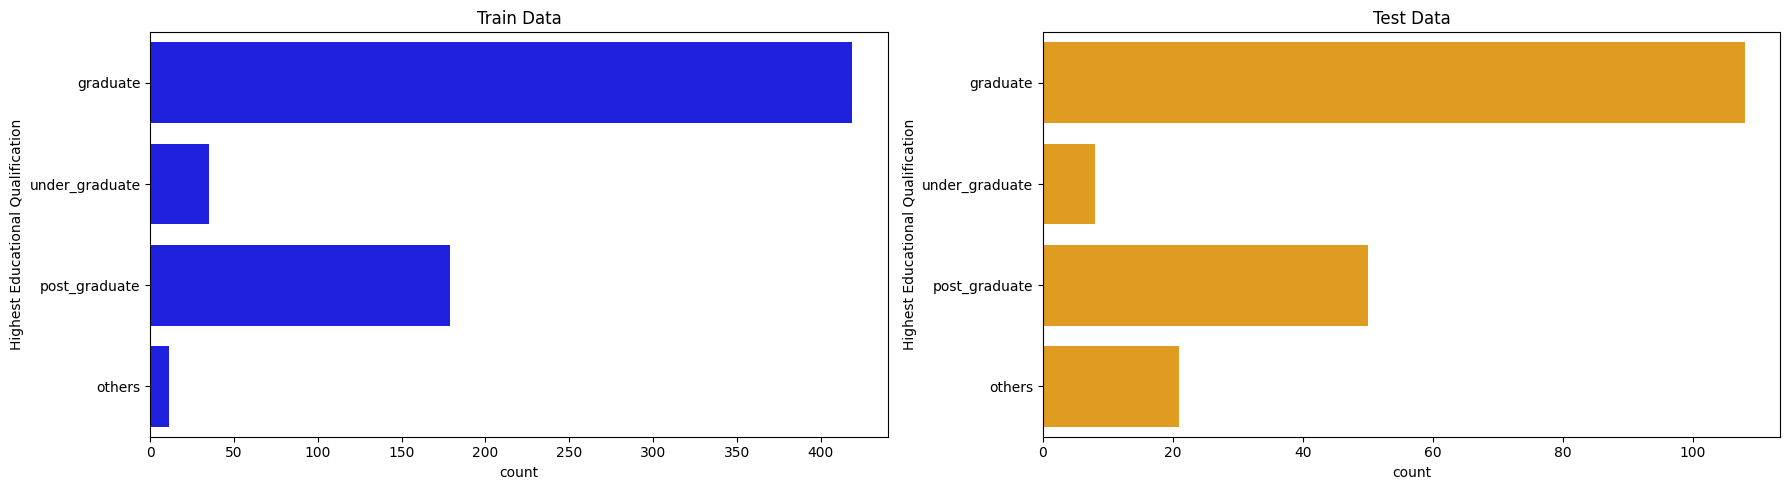

In [ ]:
count_plot('Highest Educational Qualification') #remove : others,nan,deploma holders

In [ ]:
keywords= ['graduation','graduate','post graduate','under graduate','diploma']
scan_keywords(test,'education',keywords)

In [ ]:
test['education'].value_counts()

education
NONE                  182
graduate                2
graduation              2
graduate, graduate      1
Name: count, dtype: int64

In [ ]:
train['How many are earning family members ? [Other then yourself]2'] = train['How many are earning family members ? [Other then yourself]2'].fillna(-1)
train['How many are earning family members ? [Other then yourself]2'] = train['How many are earning family members ? [Other then yourself]2'].astype(int)
train['How many are earning family members ? [Other then yourself]2'] = train['How many are earning family members ? [Other then yourself]2'].clip(upper=6)

test['How many are earning family members ? [Other then yourself]2'] = test['How many are earning family members ? [Other then yourself]2'].fillna(-1)
test['How many are earning family members ? [Other then yourself]2'] = test['How many are earning family members ? [Other then yourself]2'].astype(int)
test['How many are earning family members ? [Other then yourself]2'] = test['How many are earning family members ? [Other then yourself]2'].clip(upper=5)

In [ ]:
train['How many are earning family members ? [Other then yourself]2'] = train['How many are earning family members ? [Other then yourself]2'].replace({-1:train['How many are earning family members ? [Other then yourself]2'].mean()})
test['How many are earning family members ? [Other then yourself]2'] = test['How many are earning family members ? [Other then yourself]2'].replace({-1:test['How many are earning family members ? [Other then yourself]2'].mean()})

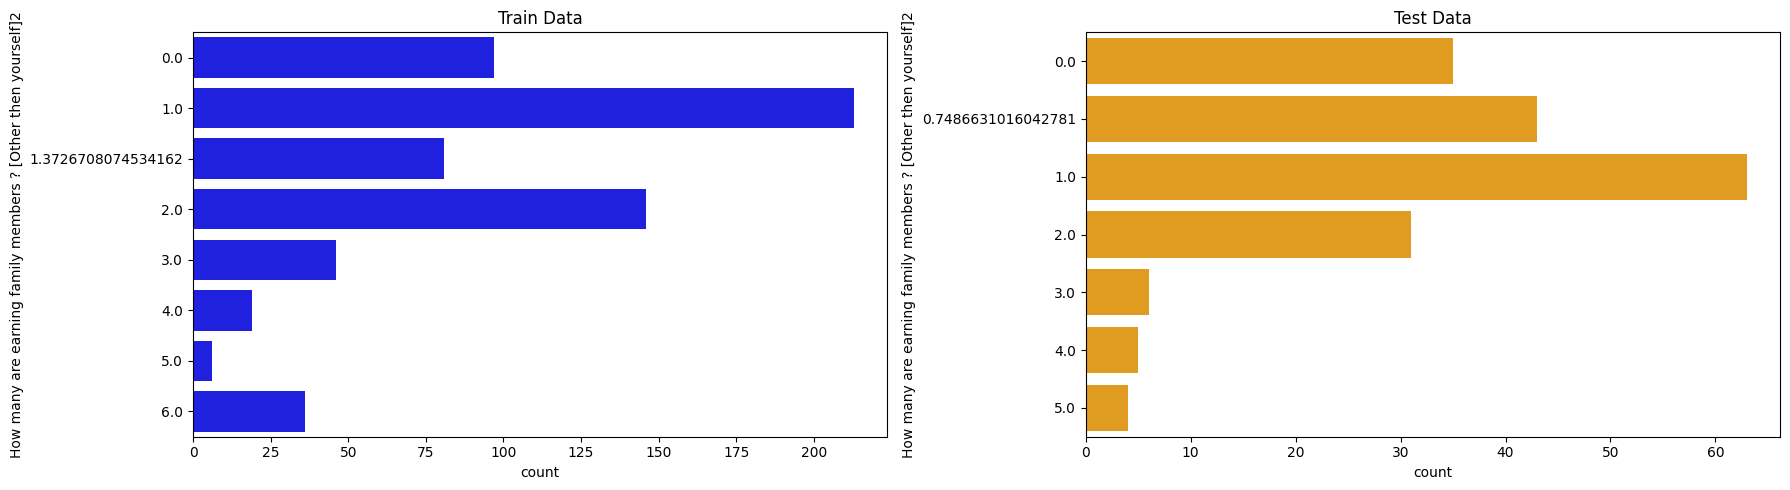

In [ ]:
count_plot('How many are earning family members ? [Other then yourself]2')

In [ ]:
# train.to_csv('train_final.csv',index=False)
# test.to_csv('test_final.csv',index=False)

In [ ]:
train['Highest Educational Qualification'] = train.apply(lambda row: 'graduate' if row['Highest Educational Qualification'] == 'nan' and row['education'] !="NONE" else row['Highest Educational Qualification'], axis=1)


In [ ]:
train.isnull().sum()

CandidateID                                                                      0
Designation                                                                      0
Have you Completed your Graduation ?                                             0
Highest Educational Qualification                                                0
Total no of years Experience [before joining Piramal]                            0
Previous Industry worked with [before joining Piramal]                           0
Name of your Previous Organization / Company                                     0
How many Organization that you have worked before joining Piramal Finance ?      0
Average Incentive [per month] earned in your pervious company ?                  0
How did you come to know about the role at Piramal Finance ?                     0
Which Products you are selling in your pervious role ?                           0
What was the average ticket size handled at your end in previous role ?          0
How 

In [ ]:
train['Have you Completed your Graduation ?'].value_counts(),test['Have you Completed your Graduation ?'].value_counts()

(Have you Completed your Graduation ?
 full_time    614
 part_time     30
 Name: count, dtype: int64,
 Have you Completed your Graduation ?
 full_time    163
 part_time     24
 Name: count, dtype: int64)

In [ ]:
train['edu_comp'] = train['Have you Completed your Graduation ?'].replace({'full_time':2,'part_time':1})
test['edu_comp'] = test['Have you Completed your Graduation ?'].replace({'full_time':2,'part_time':1})

In [ ]:
train['qualification'] = train['Highest Educational Qualification'].replace({'graduate':4,'post_graduate':3,'under_graduate':2,'others':1})
test['qualification'] = test['Highest Educational Qualification'].replace({'graduate':4,'post_graduate':3,'under_graduate':2,'others':1})

In [ ]:
train['total_exp_year']=train['Total no of years Experience [before joining Piramal]']
test['total_exp_year']=test['Total no of years Experience [before joining Piramal]']

In [ ]:
train['prev_industry_work'] = train['Previous Industry worked with [before joining Piramal]'].replace({'nbfc':5, 'banking':4, 'others':3, 'insurance':2, 'non_nbfc':1})
test['prev_industry_work'] = test['Previous Industry worked with [before joining Piramal]'].replace({'nbfc':5, 'banking':4, 'others':3, 'insurance':2, 'non_nbfc':1})

In [ ]:
train['total_org_b4_piramal'] = train['How many Organization that you have worked before joining Piramal Finance ?']
test['total_org_b4_piramal'] = test['How many Organization that you have worked before joining Piramal Finance ?']

In [ ]:
train['prev_product_selling_work'] = train['Which Products you are selling in your pervious role ?'].replace({'MSME':10, 'Personal':11, 'Housing':14, 'CASA':9, 'Others':12, 'NONE':13, 'FMCG':4,
       'Business':6, 'MSME, CASA':2, 'Secured, Business':7, 'business':8,
       'Personal, CASA':1, 'Housing, CASA':3, 'nan':5})

test['prev_product_selling_work']= test['Which Products you are selling in your pervious role ?'].replace({'MSME':10, 'Personal':11, 'Housing':14, 'CASA':9, 'Others':12, 'NONE':13, 'FMCG':4,
       'Business':6, 'MSME, CASA':2, 'Secured, Business':7, 'business':8,
       'Personal, CASA':1, 'Housing, CASA':3, 'nan':5,'casa, personal':1,'personal':11})

In [ ]:
train['Which Products you are selling in your pervious role ?'].unique()

array(['MSME', 'Personal', 'Housing', 'CASA', 'Others', 'NONE', 'FMCG',
       'Business', 'MSME, CASA', 'Secured, Business', 'business',
       'Personal, CASA', 'Housing, CASA', 'nan'], dtype=object)

In [ ]:
test['prev_product_selling_work'].value_counts()

prev_product_selling_work
14    60
13    41
12    28
10    16
11    15
9     10
6      5
5      4
1      2
8      2
7      2
4      1
3      1
Name: count, dtype: int64

In [ ]:
# test['prev_product_selling_work'].value_counts()

In [ ]:
# test = test.drop(test[test['prev_product_selling_work'].isin(['Housing, CASA','Business','personal'])].index)

In [ ]:
train['family_member_dep'] = train['How many members are dependent on you ?']
test['family_member_dep'] = test['How many members are dependent on you ?']

In [ ]:
train['Department'].unique()

array(['mass_affluent_housing', 'sales', 'affordable_housing',
       'secured_business_loan', 'business_loans', 'budget_housing',
       'personal_loans', 'housing_finance'], dtype=object)

In [ ]:
train['department'] = train['Department'].replace({'mass_affluent_housing':7, 'sales':6, 'affordable_housing':8,
       'secured_business_loan':5, 'business_loans':4, 'budget_housing':3,
       'personal_loans':1, 'housing_finance':2})
test['department'] = test['Department'].replace({'mass_affluent_housing':7, 'sales':6, 'affordable_housing':8,
       'secured_business_loan':5, 'business_loans':4, 'budget_housing':3})

In [ ]:
train['prev_ticket_size']= train['prev_ticket_size'].fillna(train['prev_ticket_size'].mean())
test['prev_ticket_size']= test['prev_ticket_size'].fillna(train['prev_ticket_size'].mean())

In [ ]:
X = train[[ 'avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal',
        'family_member_dep', 'department','prev_product_selling_work','edu_comp']]
y = train['Performance']

In [ ]:
X.isnull().sum()

avg_prev_earned_salary_per_month    0
prev_ticket_size                    0
family_size_max                     0
how_many_prev_org                   0
qualification                       0
total_exp_year                      0
prev_industry_work                  0
total_org_b4_piramal                0
family_member_dep                   0
department                          0
prev_product_selling_work           0
edu_comp                            0
dtype: int64

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
import lazypredict
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_test, y_train, y_test)

100%|██████████| 29/29 [00:01<00:00, 18.62it/s]

[LightGBM] [Info] Number of positive: 198, number of negative: 317
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 515, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384466 -> initscore=-0.470635
[LightGBM] [Info] Start training from score -0.470635
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
PassiveAggressiveClassifier,0.63,0.63,0.63,0.63,0.02
AdaBoostClassifier,0.66,0.63,0.63,0.64,0.13
NearestCentroid,0.63,0.63,0.63,0.63,0.02
BernoulliNB,0.65,0.61,0.61,0.63,0.02
RidgeClassifierCV,0.64,0.59,0.59,0.60,0.02
RidgeClassifier,0.64,0.59,0.59,0.60,0.02
LogisticRegression,0.63,0.58,0.58,0.59,0.02
LinearSVC,0.63,0.58,0.58,0.59,0.08
QuadraticDiscriminantAnalysis,0.61,0.58,0.58,0.59,0.02


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Concatenate resampled features and target variable into a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Performance')], axis=1)

In [ ]:

X1 = resampled_df[['avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal',
        'family_member_dep', 'department','prev_product_selling_work','edu_comp']]
y1 = resampled_df['Performance']

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y1,test_size=0.2,random_state=43)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train1, x_test1, y_train1, y_test1)

100%|██████████| 29/29 [00:04<00:00,  6.35it/s]

[LightGBM] [Info] Number of positive: 300, number of negative: 325
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 625, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.480000 -> initscore=-0.080043
[LightGBM] [Info] Start training from score -0.080043
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.73,0.74,0.74,0.73,0.35
RandomForestClassifier,0.72,0.72,0.72,0.72,0.47
XGBClassifier,0.70,0.70,0.70,0.70,0.13
NuSVC,0.69,0.69,0.69,0.70,0.09
BaggingClassifier,0.68,0.68,0.68,0.68,0.29
LGBMClassifier,0.66,0.67,0.67,0.66,0.21
GaussianNB,0.65,0.65,0.65,0.65,0.02
CalibratedClassifierCV,0.64,0.65,0.65,0.64,0.85
DecisionTreeClassifier,0.64,0.64,0.64,0.64,0.14


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



svc = SVC()




# svc_grid_search = GridSearchCV(svc, svc_param_grid, cv=5)

svc.fit(x_train1, y_train1)

# best_svc = svc_grid_search.best_estimator_


svc_predictions = svc.predict(x_test1)

svc_accuracy = accuracy_score(y_test1, svc_predictions)
print("SVC Accuracy:", svc_accuracy)




SVC Accuracy: 0.4968152866242038


In [ ]:
y_train1.unique()

array([0, 1])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import LeakyReLU, ELU

scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

# Define the neural network model
model = Sequential([
    Dense(64, activation=LeakyReLU(alpha=0.1), input_shape=(x_train1.shape[1],)),
    Dropout(0.5),
    Dense(32, activation=ELU(alpha=1.0)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])



model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train1, y_train1, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# # Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test1, y_test1, verbose=0)
print("Test Accuracy:", test_accuracy)

# Make predictions
# predictions = model.predict_classes(x_test1)


Epoch 1/50
18/18 [==============================] - 3s 25ms/step - loss: 0.7713 - accuracy: 0.5427 - val_loss: 0.6790 - val_accuracy: 0.5079
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7454 - accuracy: 0.5534 - val_loss: 0.6701 - val_accuracy: 0.5556
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7186 - accuracy: 0.5712 - val_loss: 0.6679 - val_accuracy: 0.6032
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.7214 - accuracy: 0.5836 - val_loss: 0.6704 - val_accuracy: 0.6190
Epoch 5/50
18/18 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.6210 - val_loss: 0.6786 - val_accuracy: 0.6349
Epoch 6/50
18/18 [==============================] - 0s 9ms/step - loss: 0.6893 - accuracy: 0.6121 - val_loss: 0.6820 - val_accuracy: 0.6508
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6814 - accuracy: 0.6032 - val_loss: 0.6903 - val_accuracy: 0.6349
Epoch 8/50
18/18 [=

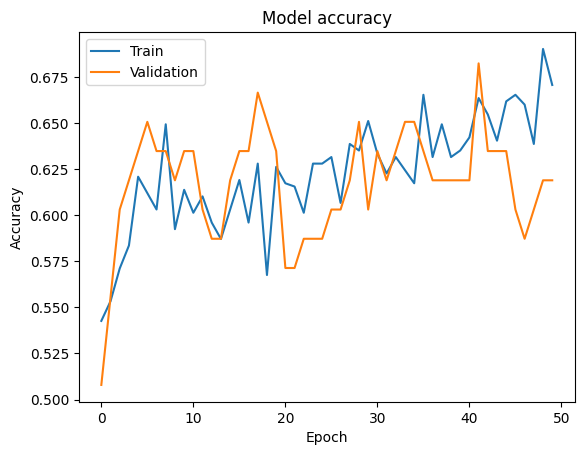

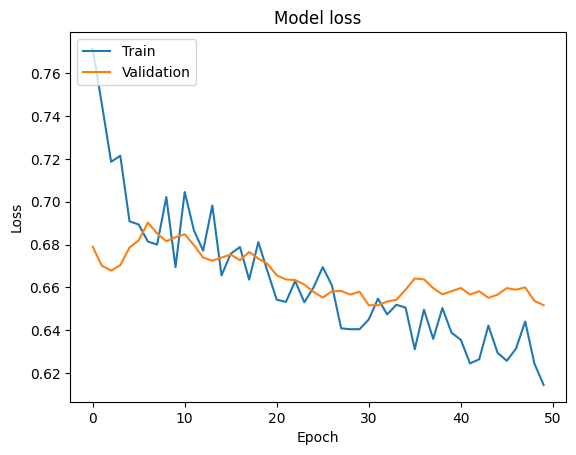

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
x_test1.shape,y_train1.shape,x_train1.shape,y_test1.shape

((157, 10), (625,), (625, 10), (157,))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
extra_trees = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the ExtraTreesClassifier
extra_trees.fit(x_train2, y_train2)

# Make predictions
predictions3 = extra_trees.predict(x_test2)

In [ ]:
rfc = RandomForestClassifier()


# Initialize GridSearchCV for RandomForestClassifier
# rfc_grid_search = GridSearchCV(rfc, rfc_param_grid, cv=5)

# Fit the GridSearchCV for RandomForestClassifier
rfc.fit(x_train1, y_train1)

# Get the best RandomForestClassifier model
# best_rfc = rfc_grid_search.best_estimator_

# Predictions using the best RandomForestClassifier model
rfc_predictions = rfc.predict(x_test1)

# Evaluate the RandomForestClassifier model
rfc_accuracy = accuracy_score(y_test1, rfc_predictions)
print("RandomForestClassifier Accuracy:", rfc_accuracy)

RandomForestClassifier Accuracy: 0.6942675159235668


In [ ]:
test['total_org_b4_piramal'] = test['total_org_b4_piramal'].fillna(test['total_org_b4_piramal'].mean())

In [ ]:
ExtraTreesClassifier

In [ ]:

x_train2 = resampled_df[['avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal','prev_product_selling_work','edu_comp',
        'family_member_dep', 'department']]
y_train2 = resampled_df['Performance']

x_test2 = test[['avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal','prev_product_selling_work','edu_comp',
        'family_member_dep', 'department']]

In [ ]:
x_test2.isnull().sum()

avg_prev_earned_salary_per_month    0
prev_ticket_size                    0
family_size_max                     0
how_many_prev_org                   0
qualification                       0
total_exp_year                      0
prev_industry_work                  0
total_org_b4_piramal                0
prev_product_selling_work           0
edu_comp                            0
family_member_dep                   0
department                          0
dtype: int64

In [ ]:
# scaler = StandardScaler()
# x_train2 = scaler.fit_transform(x_train2)
# x_test2 = scaler.transform(x_test2)


In [ ]:
rfc = RandomForestClassifier(n_estimators = 500)



rfc.fit(x_train2, y_train2)


rfc_predictions = rfc.predict(x_test2)



In [ ]:
tt1 = pd.DataFrame({'CandidateID':test['CandidateID'],'Performance':rfc_predictions})

In [ ]:
tt1.to_csv('last_final_5.csv',index=False)

In [ ]:
rfc_predictions

array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import LeakyReLU, ELU
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

# Define the neural network model
model1 = Sequential([
    Dense(64, activation=LeakyReLU(alpha=0.1), input_shape=(x_train2.shape[1],)),
    Dropout(0.5),
    Dense(32, activation=ELU(alpha=1.0)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model with callbacks
history = model1.fit(x_train2, y_train2, epochs=45, batch_size=32,
                    validation_split=0.1, verbose=1)

# # # Evaluate the model
# test_loss, test_accuracy = model.evaluate(x_test1, y_test1, verbose=0)
# print("Test Accuracy:", test_accuracy)

# Make predictions
#


Epoch 1/45
22/22 [==============================] - 2s 19ms/step - loss: 0.8035 - accuracy: 0.4893 - val_loss: 0.8248 - val_accuracy: 0.3165
Epoch 2/45
22/22 [==============================] - 0s 7ms/step - loss: 0.7596 - accuracy: 0.5334 - val_loss: 0.8365 - val_accuracy: 0.2532
Epoch 3/45
22/22 [==============================] - 0s 7ms/step - loss: 0.7071 - accuracy: 0.5647 - val_loss: 0.7741 - val_accuracy: 0.3671
Epoch 4/45
22/22 [==============================] - 0s 8ms/step - loss: 0.7396 - accuracy: 0.5349 - val_loss: 0.7295 - val_accuracy: 0.4937
Epoch 5/45
22/22 [==============================] - 0s 7ms/step - loss: 0.7164 - accuracy: 0.5548 - val_loss: 0.7460 - val_accuracy: 0.4557
Epoch 6/45
22/22 [==============================] - 0s 8ms/step - loss: 0.7091 - accuracy: 0.5718 - val_loss: 0.7170 - val_accuracy: 0.5570
Epoch 7/45
22/22 [==============================] - 0s 7ms/step - loss: 0.6916 - accuracy: 0.5832 - val_loss: 0.7351 - val_accuracy: 0.5316
Epoch 8/45
22/22 [=

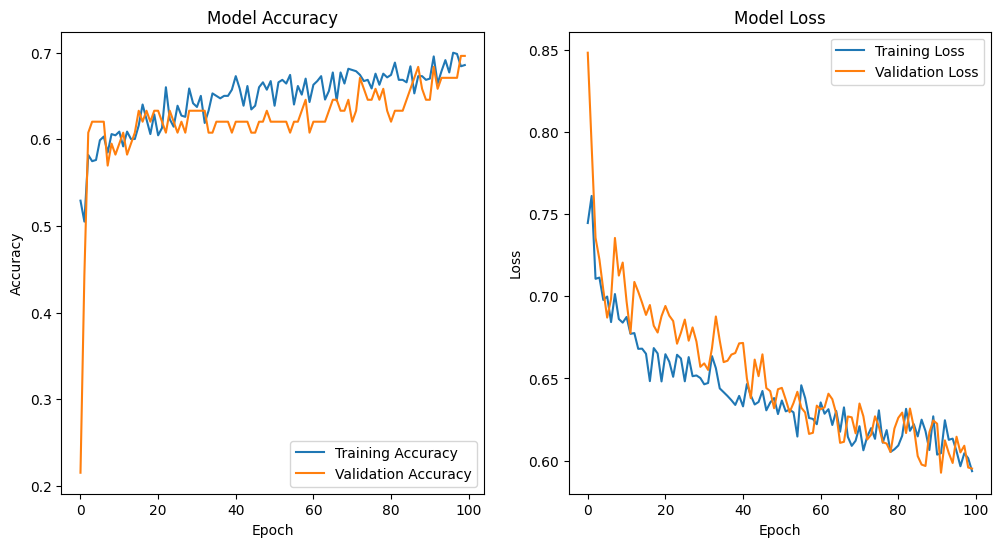

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='lower right')

# Plot training & validation loss values
axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Model Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='upper right')

In [ ]:
predictions1 = model1.predict(x_test2)

6/6 [==============================] - 0s 2ms/step


In [ ]:
binary_predictions = np.where(predictions1 > 0.5, 1, 0)

In [ ]:
binary_predictions_1d = binary_predictions.ravel()

In [ ]:
binary_predictions_1d

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train = resampled_df[['avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal',
       'prev_product_selling_work', 'family_member_dep', 'department']]
Y_train = resampled_df['Performance']

In [ ]:
test['prev_product_selling_work'] =test['prev_product_selling_work'].astype(int)

In [ ]:
X_test = test[['avg_prev_earned_salary_per_month', 'prev_ticket_size',
        'family_size_max',
       'how_many_prev_org', 'qualification', 'total_exp_year',
       'prev_industry_work', 'total_org_b4_piramal',
       'prev_product_selling_work', 'family_member_dep', 'department']]

In [ ]:
model = XGBClassifier()

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
subb111 = pd.DataFrame({'CandidateID':test['CandidateID'],'Performance':predictions3})

In [ ]:
subb111.to_csv('last_final_4.csv',index=False)

In [ ]:
subb = pd.DataFrame({'CandidateID':test1['CandidateID']})

In [ ]:
subb1.to_csv('finals24.csv',index=False)

In [ ]:
aa = pd.read_csv('/content/finals24.csv')
bb = pd.read_csv('/content/submission24.csv')

In [ ]:
final_file = pd.merge(aa,bb,how='left',on='CandidateID')

In [ ]:
final_file.to_csv('final_csv.csv',index=False)